In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka/grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka0006.nc')
ds_grl40_bm5_paleo17a_CT4_BH0_m1ka_pkp_init = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka/grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka0009.nc')

H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
age_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc")

H_data = H_data_40["H"].data
H_uncert_data = H_data_40["H_uncert"].data
age_c_data = age_data_40["age_c"].data
age_c_uncert_data = age_data_40["age_c_uncert_real"].data

mask_H = H_data >= 0.0
mask_H = mask_H.astype(float)
mask_age_c = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 60000 and H_data[j, i] >= 2000.0:
                mask_age_c[kc, j, i] = 1.0

In [3]:
sicopolis_dir = '/home/shreyas/update_to_develop_sicopolis/sicopolis_tuneAll'
simulation = 'grl40_bm5_paleo17a_CT4_BH0_AC_BM5_m11ka_pkp'
dict_sico_out_folder_prefixes = {"nodiff": "N",
                                 "tlm": "FORWARD",
                                 "adj": "ADJOINT",
                                 "tlm_action": "FORWARDHESSACTION",
                                 "adj_action": "ADJHESSACTION"}
dict_ad_exec_cmds_suffixes = {"nodiff": "nodiff",
                              "tlm": "forward",
                              "adj": "adjoint",
                              "tlm_action": "forwardhessaction",
                              "adj_action": "adjointhessaction"}
dict_ad_log_file_suffixes = {"nodiff": "nodiff",
                             "tlm": "tlm",
                             "adj": "adj",
                             "tlm_action": "tlm_hessaction",
                             "adj_action": "adj_hessaction"}
dict_ad_nc_suffixes = {"nodiff": "nodiff",
                       "tlm": "tlm",
                       "adj": "adj",
                       "tlm_action": "tlm_hessaction",
                       "adj_action": "adj_hessaction"}

KCMAX = 80
exp_sigma_level = dataCleaner.exp_sigma_level(zeta = np.arange(0,1+1./KCMAX,1./KCMAX),
                                              exponent = 2.0)
xModel40       = np.arange(-72.,97.,4.0)*10
yModel40       = np.arange(-345.,-56.,4.0)*10
time_ad = np.arange(12, dtype=float)
IMAX = xModel40.shape[0]-1
JMAX = yModel40.shape[0]-1

data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['q_geo'].data
log_q_geo = np.where(data > 0, np.log10(data), -100)
data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['H'].data
log_H = np.where(data > 0, np.log10(data), -100)
zs = np.zeros((JMAX+1, IMAX+1), dtype=float)
zl = np.zeros((JMAX+1, IMAX+1), dtype=float)
zl0 = np.zeros((JMAX+1, IMAX+1), dtype=float)
zb = np.zeros((JMAX+1, IMAX+1), dtype=float)

log_c_slide_init = np.log10(13.5)*np.ones((JMAX+1, IMAX+1))
log_gamma_s = np.log10(0.070458)*np.ones((JMAX+1, IMAX+1))
log_s_stat = np.log10(5.0)
log_beta1 = np.log10(2.73)
log_beta2 = np.log10(7.28)
log_Pmax = np.log10(0.6)
log_mu = np.log10(9.7155)
# log_gamma_s = 0.0*np.ones((JMAX+1, IMAX+1))
# log_s_stat = 0.0
# log_beta1 = 0.0
# log_beta2 = 0.0
# log_Pmax = 0.0
# log_mu = 0.0
log_c_dis_da = np.log10(15659.0)
log_RHO_A = np.log10(3300.0)
log_time_lag_asth = np.log10(3000.0)

temp_c = np.zeros((KCMAX+1, JMAX+1, IMAX+1), dtype=float)
data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['age_c'].data
log_age_c = np.where(data > 0, np.log10(data), -100)

dict_og_params_fields_vals = {"xx_c_slide_init": log_c_slide_init,
                    "xx_q_geo": log_q_geo,
                    "xx_H": log_H,
                    "xx_gamma_s": log_gamma_s,
                    "xx_s_stat": log_s_stat,
                    "xx_beta1": log_beta1,
                    "xx_beta2": log_beta2,
                    "xx_Pmax": log_Pmax,
                    "xx_mu": log_mu,
                    "xx_c_dis_da": log_c_dis_da,
                    "xx_RHO_A": log_RHO_A,
                    "xx_time_lag_asth": log_time_lag_asth,
                    "xx_zs": zs,
                    "xx_zl": zl,
                    "xx_zl0": zl0,
                    "xx_zb": zb,
                    "xx_temp_c": temp_c,
                    "xx_age_c": log_age_c}

dict_params_fields_num_dims = {"xx_c_slide_init": "2D",
                        "xx_q_geo": "2D",
                        "xx_H": "2D",
                        "xx_gamma_s": "2D",
                        "xx_s_stat": "2D",
                        "xx_beta1": "2D",
                        "xx_beta2": "2D",
                        "xx_Pmax": "2D",
                        "xx_mu": "2D",
                        "xx_c_dis_da": "2D",
                        "xx_RHO_A": "2D",
                        "xx_time_lag_asth": "2D",
                        "xx_zs": "2D",
                        "xx_zl": "2D",
                        "xx_zl0": "2D",
                        "xx_zb": "2D",
                        "xx_temp_c": "3D",
                        "xx_age_c": "3D"}

dict_params_coords = {"time_ad": time_ad,
               "zeta_c": exp_sigma_level,
               "y": yModel40,
               "x": xModel40}

dict_params_attrs_type = {"xx_c_slide_init": "nodiff",
                   "xx_q_geo": "nodiff",
                   "xx_H": "nodiff",
                   "xx_gamma_s": "nodiff",
                   "xx_s_stat": "nodiff",
                   "xx_beta1": "nodiff",
                   "xx_beta2": "nodiff",
                   "xx_Pmax": "nodiff",
                   "xx_mu": "nodiff",
                   "xx_c_dis_da": "nodiff",
                   "xx_RHO_A": "nodiff",
                   "xx_time_lag_asth": "nodiff",
                   "xx_zs": "nodiff",
                   "xx_zl": "nodiff",
                   "xx_zl0": "nodiff",
                   "xx_zb": "nodiff",
                   "xx_temp_c": "nodiff",
                   "xx_age_c": "nodiff"}

dict_params_fields_or_scalars = {"xx_c_slide_init": "field",
                          "xx_q_geo": "field",
                          "xx_H": "field",
                          "xx_gamma_s": "field",
                          "xx_s_stat": "scalar",
                          "xx_beta1": "scalar",
                          "xx_beta2": "scalar",
                          "xx_Pmax": "scalar",
                          "xx_mu": "scalar",
                          "xx_c_dis_da": "scalar",
                          "xx_RHO_A": "scalar",
                          "xx_time_lag_asth": "scalar",
                          "xx_zs": "field",
                          "xx_zl": "field",
                          "xx_zl0": "field",
                          "xx_zb": "field",
                          "xx_temp_c": "field",
                          "xx_age_c": "field"}

year2sec = 3.1556925445e+07
# dict_masks_observables = {"H": mask_H*H_uncert_data**(-2)}
dict_masks_observables = {"H": mask_H*H_uncert_data**(-2), "age_c": mask_age_c*(age_c_uncert_data*year2sec)**(-2)}

prior_alpha = 10.0
prior_delta_z_scaler = 1.e6

dict_prior_sigmas = {"xx_c_slide_init": None,
                          "xx_q_geo": None,
                          "xx_H": None,
                          "xx_gamma_s": None,
                          "xx_s_stat": 1.0,
                          "xx_beta1": 1.0,
                          "xx_beta2": 1.0,
                          "xx_Pmax": 1.0,
                          "xx_mu": 1.0,
                          "xx_c_dis_da": 4.0,
                          "xx_RHO_A": 3.0,
                          "xx_time_lag_asth": 3.0,
                          "xx_zs": None,
                          "xx_zl": None,
                          "xx_zl0": None,
                          "xx_zb": None,
                          "xx_temp_c": np.ones((KCMAX+1, JMAX+1, IMAX+1), dtype=float),
                          "xx_age_c": np.ones((KCMAX+1, JMAX+1, IMAX+1), dtype=float)}

dict_prior_gammas = {"xx_c_slide_init": 0.0,
                          "xx_q_geo": 1.0,
                          "xx_H": 1.0,
                          "xx_gamma_s": 1.0,
                          "xx_s_stat": None,
                          "xx_beta1": None,
                          "xx_beta2": None,
                          "xx_Pmax": None,
                          "xx_mu": None,
                          "xx_c_dis_da": None,
                          "xx_RHO_A": None,
                          "xx_time_lag_asth": None,
                          "xx_zs": 0.0,
                          "xx_zl": 0.0,
                          "xx_zl0": 1.0,
                          "xx_zb": 1.0,
                          "xx_temp_c": 1.0,
                          "xx_age_c": 1.0}

dict_prior_deltas = {"xx_c_slide_init": 0.0,
                          "xx_q_geo": 0.000001,
                          "xx_H": 0.000001,
                          "xx_gamma_s": 0.000001,
                          "xx_s_stat": None,
                          "xx_beta1": None,
                          "xx_beta2": None,
                          "xx_Pmax": None,
                          "xx_mu": None,
                          "xx_c_dis_da": None,
                          "xx_RHO_A": None,
                          "xx_time_lag_asth": None,
                          "xx_zs": 0.0,
                          "xx_zl": 0.0,
                          "xx_zl0": 0.000001,
                          "xx_zb": 0.000001,
                          "xx_temp_c": 0.000001,
                          "xx_age_c": 0.000001}

list_fields_to_ignore = ["xx_c_slide_init", "xx_zs", "xx_zl"]

# all_fields = ["xx_c_slide_init", "xx_q_geo", "xx_H", "xx_gamma_s", 
#               "xx_s_stat", "xx_beta1", "xx_beta2", "xx_Pmax", "xx_mu", "xx_c_dis_da", "xx_RHO_A", "xx_time_lag_asth", 
#               "xx_zs", "xx_zl", "xx_zl0", "xx_zb",
#               "xx_temp_c", "xx_age_c"]

MAX_ITERS_SOR = 100
OMEGA_SOR = 1.5

/tmp/ipykernel_502124/947711376.py:36: RuntimeWarning: divide by zero encountered in log10
  log_H = np.where(data > 0, np.log10(data), -100)
/tmp/ipykernel_502124/947711376.py:61: RuntimeWarning: divide by zero encountered in log10
  log_age_c = np.where(data > 0, np.log10(data), -100)


In [4]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_params_fields_vals, dict_params_fields_num_dims, 
                                dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                                prior_alpha, prior_delta_z_scaler, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

DA.copy_dir(sicopolis_dir + "/src/subroutines/tapenade/ad_io/ad_input_nodiff.nc",
            sicopolis_dir + "/src/subroutines/tapenade/ad_io/ad_input_nodiff_prior.nc")

ds_prior = xr.open_dataset(sicopolis_dir + "/src/subroutines/tapenade/ad_io/ad_input_nodiff_prior.nc")
ds_prior["prior_alpha"] = xr.DataArray([prior_alpha], dims=["scalar"], attrs={"type": "hyperparameter_prior"})
ds_prior["prior_delta_z_scaler"] = xr.DataArray([prior_delta_z_scaler], dims=["scalar"], attrs={"type": "hyperparameter_prior"})

# ds_prior["xx_gamma_s"].data[:,:] = np.log10(0.070458)
# ds_prior["xx_s_stat"].data[:,:] = np.log10(5.0)
# ds_prior["xx_beta1"].data[:,:] = np.log10(2.73)
# ds_prior["xx_beta2"].data[:,:] = np.log10(7.28)
# ds_prior["xx_Pmax"].data[:,:] = np.log10(0.6)
# ds_prior["xx_mu"].data[:,:] = np.log10(9.7155)

# Ensure the sequence in these arrays is the same as defined in ad_specs.h
ds_prior["genarr2d_gamma_arr"] = xr.DataArray(np.array([dict_prior_gammas["xx_c_slide_init"],
                                                        0.0,
                                                        dict_prior_gammas["xx_q_geo"],
                                                        dict_prior_gammas["xx_H"],
                                                        dict_prior_gammas["xx_gamma_s"],
                                                        0.0,
                                                        0.0,
                                                        0.0,
                                                        0.0,
                                                        0.0,
                                                        0.0,
                                                        0.0,
                                                        dict_prior_gammas["xx_zs"],
                                                        dict_prior_gammas["xx_zl"],
                                                        dict_prior_gammas["xx_zl0"],
                                                        dict_prior_gammas["xx_zb"]], dtype=np.float64), 
                                              dims=["genarr2d"], 
                                              attrs={"type": "hyperparameter_prior"})
ds_prior["genarr2d_delta_arr"] = xr.DataArray(np.array([dict_prior_deltas["xx_c_slide_init"],
                                                        0.0,
                                                        dict_prior_deltas["xx_q_geo"],
                                                        dict_prior_deltas["xx_H"],
                                                        dict_prior_deltas["xx_gamma_s"],
                                                        (dict_prior_sigmas["xx_s_stat"] * np.sqrt((IMAX+1)*(JMAX+1)))**(-1),
                                                        (dict_prior_sigmas["xx_beta1"] * np.sqrt((IMAX+1)*(JMAX+1)))**(-1),
                                                        (dict_prior_sigmas["xx_beta2"] * np.sqrt((IMAX+1)*(JMAX+1)))**(-1),
                                                        (dict_prior_sigmas["xx_Pmax"] * np.sqrt((IMAX+1)*(JMAX+1)))**(-1),
                                                        (dict_prior_sigmas["xx_mu"] * np.sqrt((IMAX+1)*(JMAX+1)))**(-1),
                                                        (dict_prior_sigmas["xx_RHO_A"] * np.sqrt((IMAX+1)*(JMAX+1)))**(-1),
                                                        (dict_prior_sigmas["xx_time_lag_asth"] * np.sqrt((IMAX+1)*(JMAX+1)))**(-1),
                                                        dict_prior_deltas["xx_zs"],
                                                        dict_prior_deltas["xx_zl"],
                                                        dict_prior_deltas["xx_zl0"],
                                                        dict_prior_deltas["xx_zb"]], dtype=np.float64), 
                                              dims=["genarr2d"], 
                                              attrs={"type": "hyperparameter_prior"})
ds_prior["genarr3d_gamma_arr"] = xr.DataArray(np.array([dict_prior_gammas["xx_temp_c"], 
                                                        dict_prior_gammas["xx_age_c"]], dtype=np.float64), 
                                              dims=["genarr3d"], 
                                              attrs={"type": "hyperparameter_prior"})
ds_prior["genarr3d_delta_arr"] = xr.DataArray(np.array([dict_prior_deltas["xx_temp_c"], 
                                                        dict_prior_deltas["xx_age_c"]], dtype=np.float64), 
                                              dims=["genarr3d"], 
                                              attrs={"type": "hyperparameter_prior"})
ds_prior["genarr3d_sigma_arr"] = xr.DataArray(np.array([dict_prior_sigmas["xx_temp_c"].flat[0], 
                                                        dict_prior_sigmas["xx_age_c"].flat[0]], dtype=np.float64), 
                                              dims=["genarr3d"], 
                                              attrs={"type": "hyperparameter_prior"})

DA.remove_dir(sicopolis_dir + "/src/subroutines/tapenade/ad_io/ad_input_nodiff_prior.nc")
ds_prior.to_netcdf(sicopolis_dir + "/src/subroutines/tapenade/ad_io/ad_input_nodiff_prior.nc")

In [5]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_params_fields_vals, dict_params_fields_num_dims, 
                                dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                                prior_alpha, prior_delta_z_scaler, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

ds_x = DA.create_ad_tlm_action_input_nc(bool_randomize = True)
ds_x_tlm_only = DA.subset_of_ds(ds_x, "type", "tlm")
    
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

DA.l2_inner_product([ds_x_tlm_only, ds_H_misfit_x], ["tlm", "adj"]), DA.l2_inner_product([ds_Ax, ds_noise_cov_inv_Ax], ["tlmhessaction", "adjhessaction"])

(327915947.1710619, 327915947.1710618)

In [6]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_params_fields_vals, dict_params_fields_num_dims, 
                                dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                                prior_alpha, prior_delta_z_scaler, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

dict_tlm_action_only_fields_vals = {}
for var in ds_x_tlm_only:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
    
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

DA.l2_inner_product([ds_x_tlm_only, ds_H_misfit_x], ["tlm", "adj"]), DA.l2_inner_product([ds_Ax, ds_noise_cov_inv_Ax], ["tlmhessaction", "adjhessaction"])

(327915947.1710619, 327915947.1710618)

In [7]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_params_fields_vals, dict_params_fields_num_dims, 
                                dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                                prior_alpha, prior_delta_z_scaler, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

dict_tlm_action_only_fields_vals = {}
for var in ds_x_tlm_only:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
    
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

ds_Cx = DA.eval_sqrt_prior_cov_action(ad_key_adj_or_adj_action_or_tlm_action = "tlm_action")
ds_A_Cx = DA.eval_tlm_action()
ds_noise_cov_inv_A_Cx = DA.eval_noise_cov_inv_action(ds_A_Cx)

dict_tlm_action_only_fields_vals = {}
for var in ds_x_tlm_only:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)

ds_C_H_misfit_Cx = DA.eval_prior_preconditioned_misfit_hessian_action()

DA.l2_inner_product([ds_x_tlm_only, ds_C_H_misfit_Cx], ["tlm", "adj"]), DA.l2_inner_product([ds_A_Cx, ds_noise_cov_inv_A_Cx], ["tlmhessaction", "adjhessaction"])

(2.9259338459311247e+19, 2.925930655453287e+19)

In [8]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x_tlm_only:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
ds_Cx = DA.eval_sqrt_prior_cov_action(ad_key_adj_or_adj_action_or_tlm_action = "tlm_action")
ds_C_inv_Cx = DA.eval_sqrt_prior_cov_inv_action()

DA.l2_inner_product([ds_C_inv_Cx, ds_C_inv_Cx], ["tlm", "tlm"]), DA.l2_inner_product([ds_x_tlm_only, ds_x_tlm_only], ["tlm", "tlm"])

(524305.5682231411, 524323.0215128057)

In [9]:
DA.l2_inner_product([ds_Cx, ds_Cx], ["tlm", "tlm"]), DA.l2_inner_product([ds_x_tlm_only, ds_x_tlm_only], ["tlm", "tlm"])

(4.803807234446358e+16, 524323.0215128057)

In [10]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_params_fields_vals, dict_params_fields_num_dims, 
                                dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                                prior_alpha, prior_delta_z_scaler, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

dict_tlm_action_only_fields_vals = {}
for var in ds_x_tlm_only:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x_tlm_only[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
ds_C_H_Cx = DA.eval_prior_preconditioned_hessian_action()

DA.l2_inner_product([ds_x_tlm_only, ds_C_H_misfit_Cx], ["tlm", "adj"]), \
DA.l2_inner_product([ds_x_tlm_only, ds_C_H_misfit_Cx], ["tlm", "adj"]) + DA.l2_inner_product([ds_x_tlm_only, ds_x_tlm_only], ["tlm", "tlm"]), \
DA.l2_inner_product([ds_x_tlm_only, ds_C_H_Cx], ["tlm", "adj"])

(2.9259338459311247e+19, 2.925933845931177e+19, 2.925933845931177e+19)

In [11]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_params_fields_vals, dict_params_fields_num_dims, 
                                dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                                prior_alpha, prior_delta_z_scaler, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

DA.gradient_descent(1)

---------------------------------------------------------------------------------------------------------------
iter 0, fc = 14025369.09970203, fc_data = 14025369.09970203, fc_reg = 0.0
---------------------------------------------------------------------------------------------------------------
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Step size alpha = 0.000244140625
---------------------------------------------------------

<xarray.Dataset> Size: 4MB
Dimensions:           (y: 73, x: 43, scalar: 1, zeta_c: 81)
Coordinates:
  * x                 (x) float64 344B -7.2e+05 -6.8e+05 ... 9.2e+05 9.6e+05
  * y                 (y) float64 584B -3.45e+06 -3.41e+06 ... -6.1e+05 -5.7e+05
Dimensions without coordinates: scalar, zeta_c
Data variables: (12/18)
    xx_c_slide_init   (y, x) float64 25kB 1.13 1.13 1.13 1.13 ... 1.13 1.13 1.13
    xx_c_dis_da       (scalar) float64 8B 12.11
    xx_q_geo          (y, x) float64 25kB -1.286 -1.28 -1.275 ... -1.145 -1.146
    xx_H              (y, x) float64 25kB -100.0 -100.0 -100.0 ... -100.0 -100.0
    xx_gamma_s        (y, x) float64 25kB -1.152 -1.152 -1.152 ... -1.152 -1.152
    xx_s_stat         (scalar) float64 8B 4.57
    ...                ...
    xx_zs             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_zl             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_zl0            (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_zb             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_temp_c         (zeta_c, y, x) float64 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    xx_age_c          (zeta_c, y, x) float64 2MB -100.0 -100.0 ... -100.0 -100.0
Attributes:
    history:  2025-02-18 14:08:09 -06:00 - Data produced

In [12]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_params_fields_vals, dict_params_fields_num_dims, 
                                dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                                prior_alpha, prior_delta_z_scaler, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

DA.inexact_gn_hessian_cg(MAX_ITERS=3, init_alpha_gd = 1.e-6)

---------------------------------------------------------------------------------------------------------------
Initial fc = 14025369.09970203, fc_data = 14025369.09970203, fc_reg = 0.0
---------------------------------------------------------------------------------------------------------------
CG iter 1
eps_TOL_CG: 158463171948.46313, norm_r_hat: 227026213477.83783
CG iter 2
eps_TOL_CG: 158463171948.46313, norm_r_hat: 316456727929.7479
H-orthoganality check = 3.643649450304052e-20
CG iter 3
eps_TOL_CG: 158463171948.46313, norm_r_hat: 159602918035.3409
H-orthoganality check = 1.2901199954751857e-20
CG iter 4
eps_TOL_CG: 158463171948.46313, norm_r_hat: 133192130039.03015
conjugate_gradient: Convergence.
Angle between p_hat and g_hat in degrees:  157.94921438932982
Step size alpha = 1.0
---------------------------------------------------------------------------------------------------------------
Outer iter 1, fc = 3948253.689930001, fc_data = 3948253.6899299975, fc_reg = 3.06665118076

<xarray.Dataset> Size: 4MB
Dimensions:           (y: 73, x: 43, scalar: 1, zeta_c: 81)
Coordinates:
  * x                 (x) float64 344B -7.2e+05 -6.8e+05 ... 9.2e+05 9.6e+05
  * y                 (y) float64 584B -3.45e+06 -3.41e+06 ... -6.1e+05 -5.7e+05
Dimensions without coordinates: scalar, zeta_c
Data variables: (12/18)
    xx_c_slide_init   (y, x) float64 25kB 1.13 1.13 1.13 1.13 ... 1.13 1.13 1.13
    xx_c_dis_da       (scalar) float64 8B 4.195
    xx_q_geo          (y, x) float64 25kB -1.286 -1.28 -1.275 ... -1.145 -1.146
    xx_H              (y, x) float64 25kB -100.0 -100.0 -100.0 ... -100.1 -100.1
    xx_gamma_s        (y, x) float64 25kB -1.152 -1.152 -1.152 ... -1.152 -1.152
    xx_s_stat         (scalar) float64 8B 0.699
    ...                ...
    xx_zs             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_zl             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_zl0            (y, x) float64 25kB -5.603e-11 -5.65e-11 ... -6.471e-11
    xx_zb             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_temp_c         (zeta_c, y, x) float64 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    xx_age_c          (zeta_c, y, x) float64 2MB -100.0 -100.0 ... -100.0 -100.0
Attributes:
    history:  2025-02-18 14:08:25 -06:00 - Data produced

In [13]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_params_fields_vals, dict_params_fields_num_dims, 
                                dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                                prior_alpha, prior_delta_z_scaler, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

sigma_B_squared, sigma_P_squared, delta_sigma_qoi_squared = DA.forward_uq_propagation(15, 5)

sigma_B_squared, sigma_P_squared, delta_sigma_qoi_squared

(1.1706766196812829e+38, 1.1706743110557688e+38, 1.97204375251836e-06)

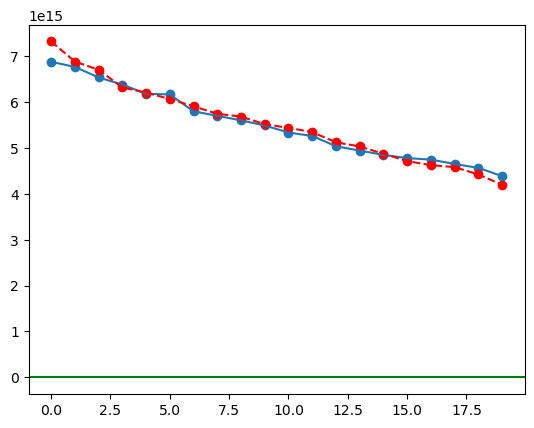

In [14]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_params_fields_vals, dict_params_fields_num_dims, 
                                dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                                prior_alpha, prior_delta_z_scaler, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

U_misfit, Lambda_misfit = DA.revd(15, 5, mode = "misfit_prior_precond")
U_full, Lambda_full = DA.revd(15, 5, mode = "full_prior_precond")

plt.scatter(np.arange(Lambda_misfit.shape[0]), np.sort(Lambda_misfit)[::-1])
plt.plot(np.sort(Lambda_misfit)[::-1])

plt.scatter(np.arange(Lambda_full.shape[0]), np.sort(Lambda_full)[::-1], color = "red")
plt.plot(np.sort(Lambda_full)[::-1], "r--")

plt.axhline(1, color = "green")

In [15]:
DA = optim_new.DataAssimilation(sicopolis_dir, simulation,
                                dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                                dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                                dict_og_params_fields_vals, dict_params_fields_num_dims, 
                                dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                                prior_alpha, prior_delta_z_scaler, dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                                MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll")

DA.l_bfgs(50, 10, init_alpha = 1.e-6)

---------------------------------------------------------------------------------------------------------------
Initial fc = 14025369.09970203, fc_data = 14025369.09970203, fc_reg = 0.0
---------------------------------------------------------------------------------------------------------------
Step size alpha = 1e-06
---------------------------------------------------------------------------------------------------------------
Iter 1, fc = 11538641.69058433, fc_data = 11538641.688807515, fc_reg = 0.0017768136109260558
---------------------------------------------------------------------------------------------------------------
Step size alpha = 1e-06
---------------------------------------------------------------------------------------------------------------
Iter 2, fc = 11538640.124030346, fc_data = 11538640.122253526, fc_reg = 0.0017768204108776493
---------------------------------------------------------------------------------------------------------------
Too big step size p

FileNotFoundError: [Errno 2] No such file or directory: '/home/shreyas/update_to_develop_sicopolis/sicopolis_tuneAll/src/subroutines/tapenade/ad_io/ad_output_adj.nc'